<a href="https://colab.research.google.com/github/apoorvyadav1111/Machine-Learning/blob/master/keras%20-%20CIFAR10%20dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
from keras.utils import np_utils

In [0]:
from keras.models import Sequential
import keras.layers as L
import keras
from keras.datasets import cifar10

## Loading Data

In [0]:
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

170500096/170498071 [==============================] - 32s 0us/step


## Visualising Data

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


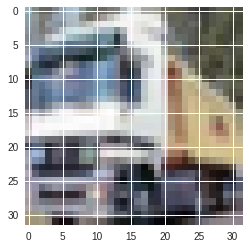

In [0]:
print(y_train[1])
plt.imshow(X_train[1])

## Normalising inputs

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

## One hot encoding output

In [0]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

## Building our CNN model 
In the following model we have used dropout, adam optimisation and one Conv2D layer.

In [0]:
model = Sequential()
model.add(L.Conv2D(32,(3,3),padding = 'valid', input_shape=(32,32,3),data_format='channels_last',activation = 'relu'))
model.add(L.MaxPooling2D(pool_size=(2,2)))
model.add(L.Dropout(0.2))
model.add(L.Conv2D(64,(3,3),padding = 'valid',activation = 'relu'))
model.add(L.MaxPooling2D(pool_size=(2,2)))
model.add(L.Dropout(0.2))
model.add(L.Flatten())
model.add(L.Dense(512,activation = 'relu'))
model.add(L.Dropout(0.3))
model.add(L.Dense(num_classes, activation = 'softmax'))
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

## Fitting our model

In [0]:
model.fit(X_train,y_train, batch_size = 64 ,epochs = 50,validation_data=(X_test,y_test),verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 16s 329us/step - loss: 1.2063 - acc: 0.5713 - val_loss: 1.0887 - val_acc: 0.6134
Epoch 2/50
50000/50000 [==============================] - 16s 317us/step - loss: 1.0097 - acc: 0.6428 - val_loss: 0.9455 - val_acc: 0.6607
Epoch 3/50
50000/50000 [==============================] - 16s 316us/step - loss: 0.8896 - acc: 0.6865 - val_loss: 0.8146 - val_acc: 0.7131
Epoch 4/50
50000/50000 [==============================] - 16s 316us/step - loss: 0.7950 - acc: 0.7217 - val_loss: 0.8372 - val_acc: 0.7060
Epoch 5/50
50000/50000 [==============================] - 16s 317us/step - loss: 0.7233 - acc: 0.7456 - val_loss: 0.7441 - val_acc: 0.7462
Epoch 6/50
50000/50000 [==============================] - 16s 317us/step - loss: 0.6661 - acc: 0.7657 - val_loss: 0.7372 - val_acc: 0.7509
Epoch 7/50
50000/50000 [==============================] - 16s 316us/step - loss: 0.6186 - acc: 0.7812 - val_loss: 0.

## Evaluating Our Model over Test Data

In [0]:
scores = model.evaluate(X_test,y_test, verbose=1)

10000/10000 [==============================] - 2s 208us/step


## Checking our Scores

In [0]:
print ("Test Loss: ",scores[0],"\n","Test Accuracy: ",scores[1]*100, "%")

Test Loss:  0.9119382247924804 
 Test Accuracy:  77.74 %
